In [51]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import acquire

In [34]:
# Start by importing telco data from acquire.py
df = acquire.get_telco_data()
print(df.head())

   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 2  0002-ORFBO   
1                2                         1                 1  0003-MKNFE   
2                1                         2                 1  0004-TLHLJ   
3                1                         2                 1  0011-IGKFF   
4                2                         2                 1  0013-EXCHZ   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes       9           Yes  ...   
1    Male               0      No         No       9           Yes  ...   
2    Male               0      No         No       4           Yes  ...   
3    Male               1     Yes         No      13           Yes  ...   
4  Female               1     Yes         No       3           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes

In [35]:
acquire.get_summary(df)

First 3 rows of the dataframe:
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 2  0002-ORFBO   
1                2                         1                 1  0003-MKNFE   
2                1                         2                 1  0004-TLHLJ   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes       9           Yes  ...   
1    Male               0      No         No       9           Yes  ...   
2    Male               0      No         No       4           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes               No               Yes   
1           No           No              Yes                No   
2           No           No               No               Yes   

  monthly_charges total_charges churn   contract_type  internet_service_type  \
0         

In [36]:
# drop duplicate columns
df = df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id'])

In [37]:
# change total_charges to a float and get rid of nulls
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [39]:
df.total_charges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [43]:
# determined that customer id has no relevant use other than a possible 
# index so I dropped it
df.drop(columns='customer_id', inplace=True)

In [44]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [45]:
df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [46]:
df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '')

In [47]:
df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'],
      dtype=object)

In [49]:
# I want to split the churns between yes and no's and the cat / nums

# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in df:
    # check to see if its an object type,
    # if so toss it in categorical
    if df[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if df[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [50]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

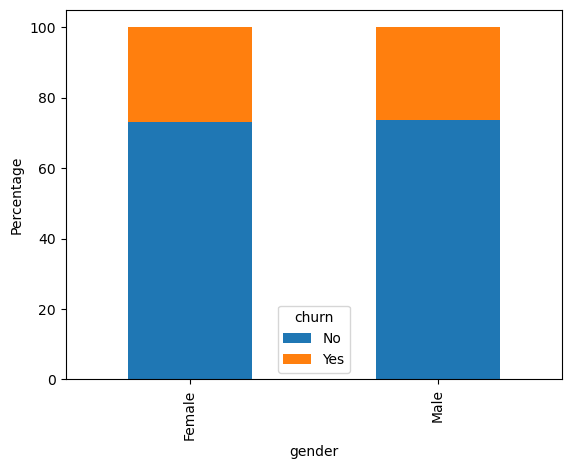

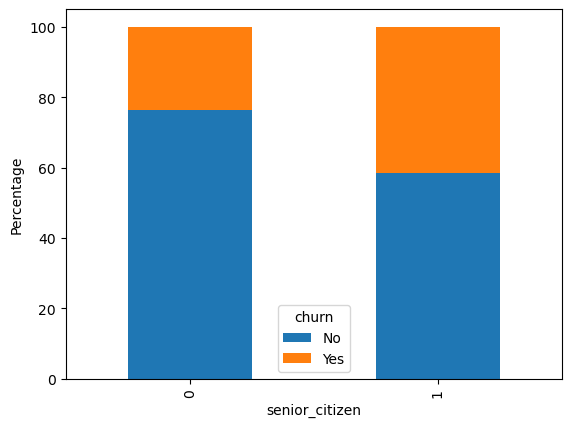

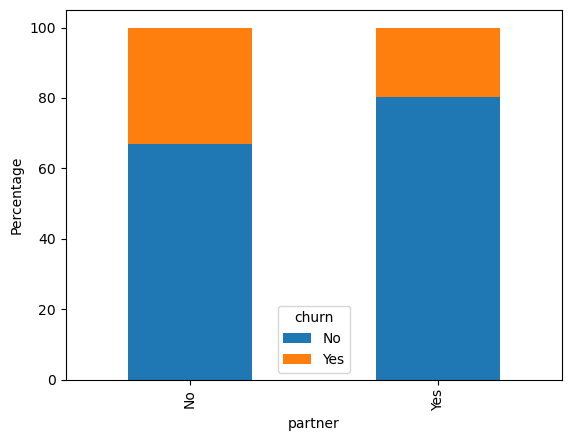

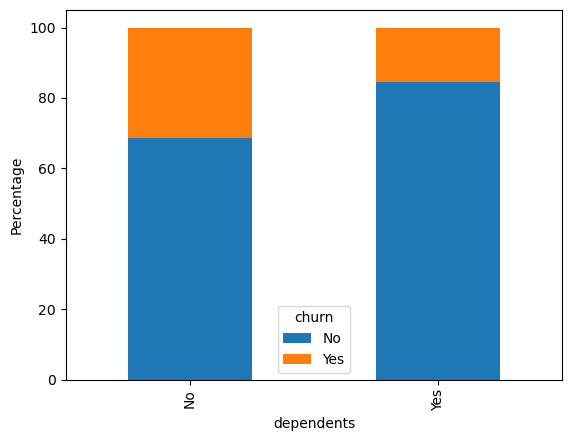

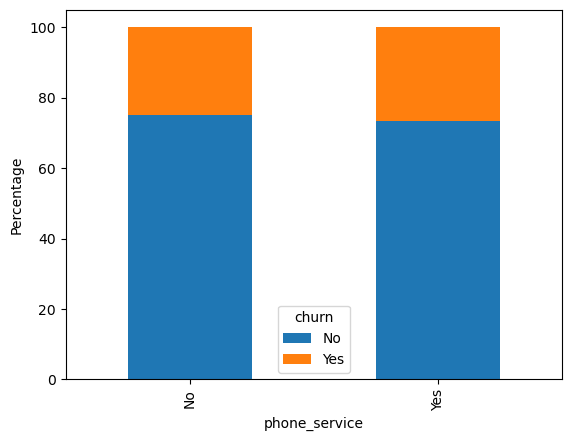

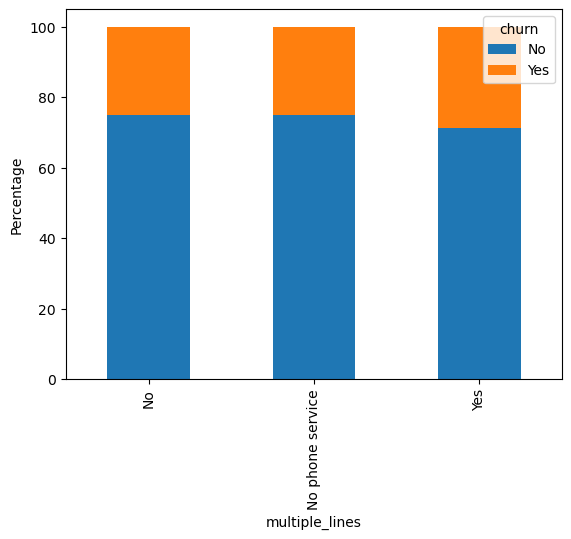

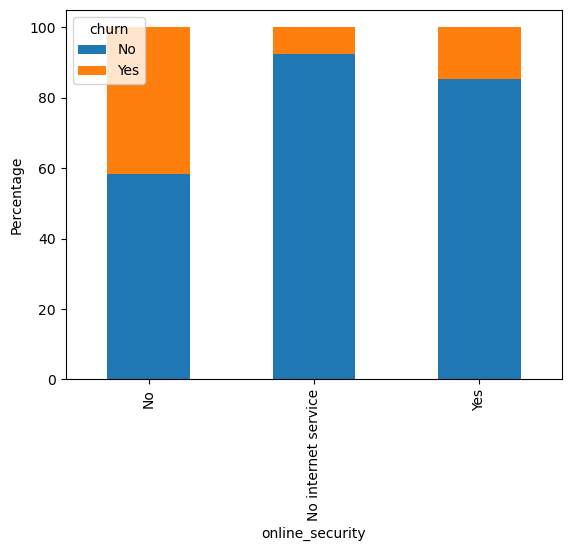

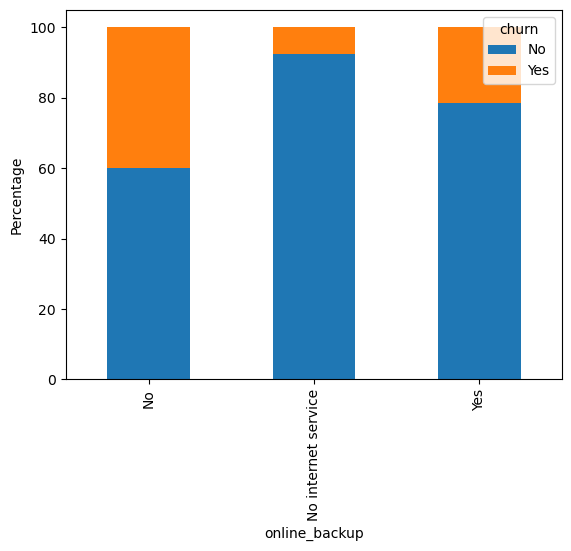

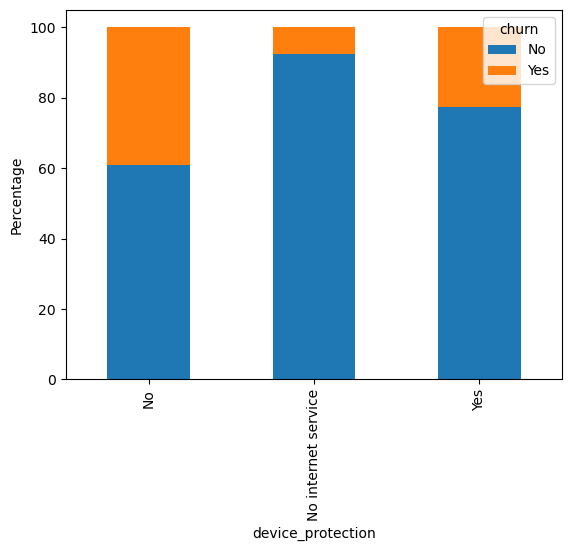

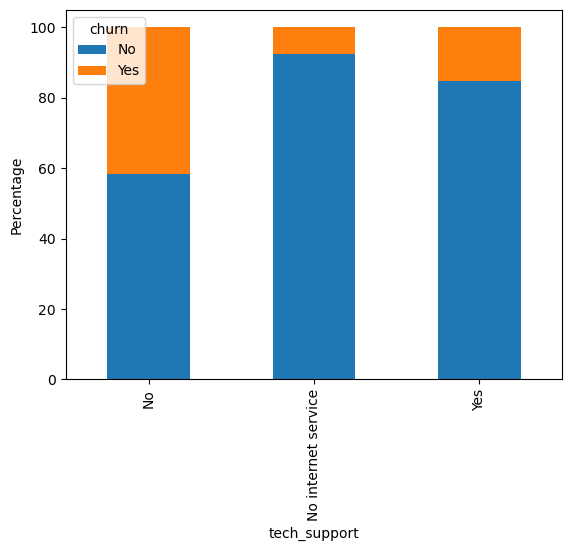

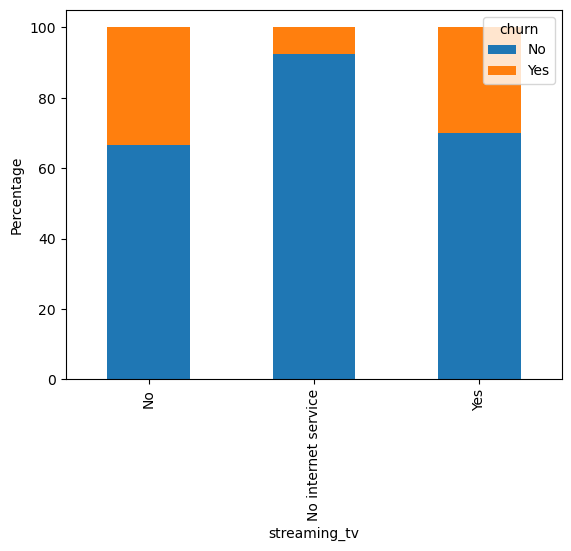

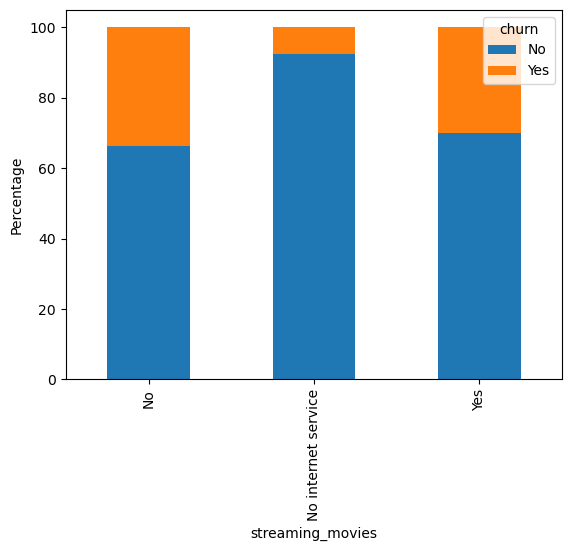

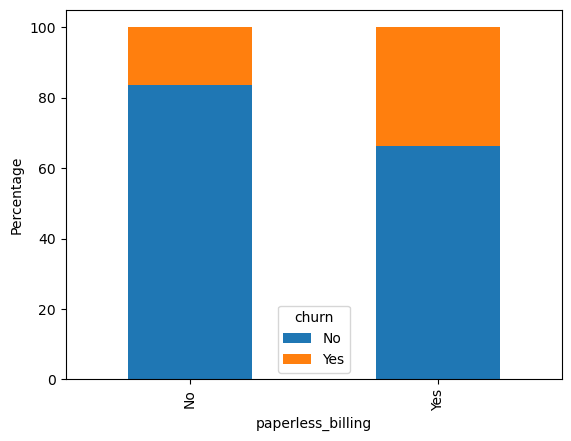

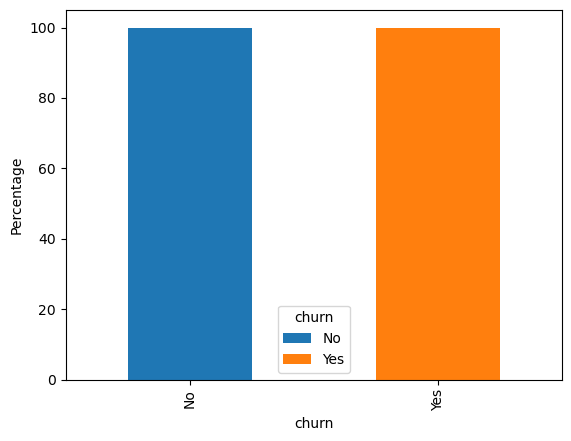

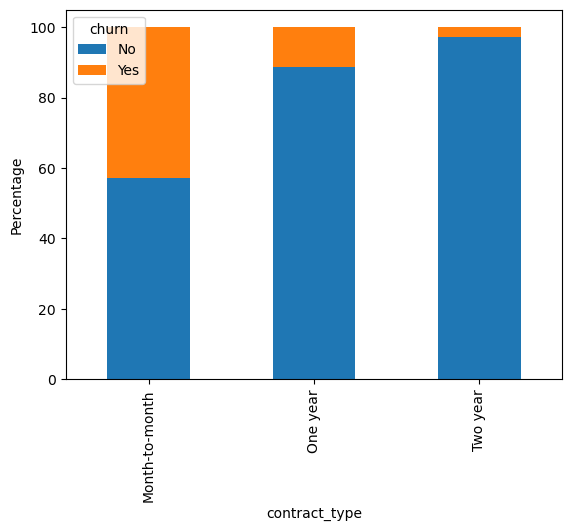

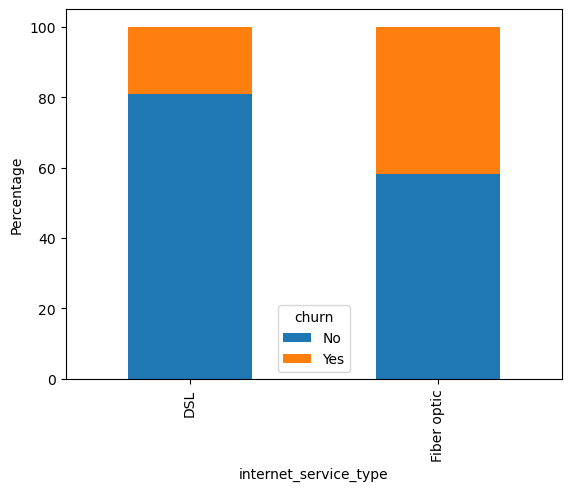

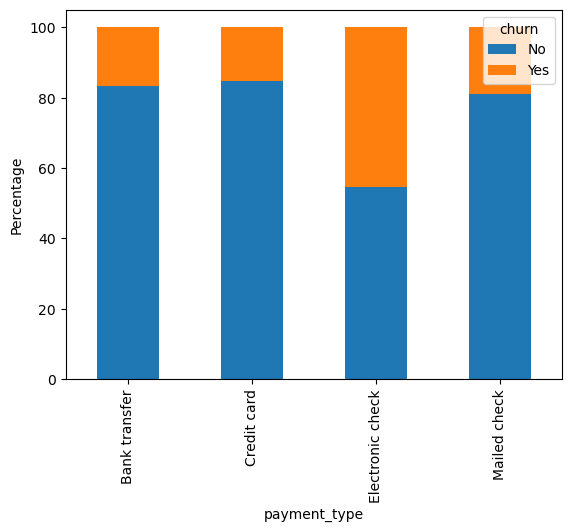

In [63]:
# Now I want to create crosstabs for all the cats_cols with churn and plot them 

def stacked_plot(col_to_stack):
    
    for index, column in enumerate(col_to_stack):
        bar_by_cat = pd.crosstab(df[column], df['churn']).apply(lambda x: x/x.sum()*100, axis=1)
        bar_by_cat.plot(kind='bar', stacked=True)
        plt.ylabel('Percentage')
        plt.xlabel(column)


stacked_plot(cat_cols)




In [64]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

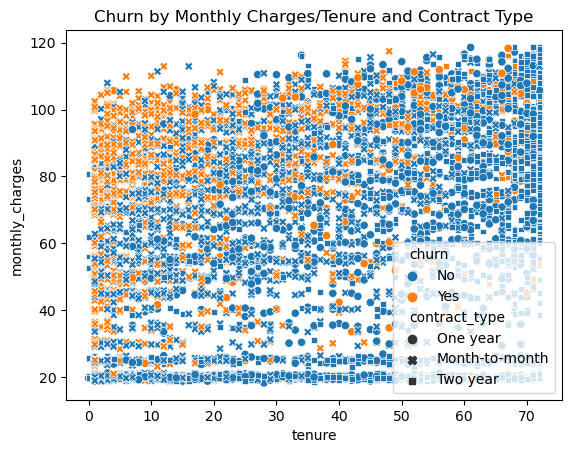

In [98]:
# Scatterplot with monthly charges, tenure, and contract type separated by churn 

sns.scatterplot(x='tenure', y='monthly_charges', data=df, hue='churn', style='contract_type')

plt.title('Churn by Monthly Charges/Tenure and Contract Type')
plt.show()